#### AN ANALYTICAL DETECTIVE

Crime is an international concern, but it is documented and handled in very different ways in different countries. 
The city of Chicago, Illinois releases crime data from 2001 onward online.
There are two main types of crimes: violent crimes, and property crimes. In this problem, we'll focus on one specific type of property crime, called "motor vehicle theft" (sometimes referred to as grand theft auto). This is the act of stealing, or attempting to steal, a car. In this problemset, we'll use some basic data analysis to understand the motor vehicle thefts in Chicago. 
We use the file mvtWeek1.csv for this problem set. 
Here is a list of descriptions of the variables:

* ID: a unique identifier for each observation
* Date: the date the crime occurred
* LocationDescription: the location where the crime occurred
* Arrest: whether or not an arrest was made for the crime (TRUE if an arrest was made, and FALSE if an arrest was not made)
* Domestic: whether or not the crime was a domestic crime, meaning that it was committed against a family member (TRUE if it was domestic, and FALSE if it was not domestic)
* Beat: the area, or "beat" in which the crime occurred. This is the smallest regional division defined by the Chicago police department.
* District: the police district in which the crime occured. Each district is composed of many beats, and are defined by the Chicago Police Department.
* CommunityArea: the community area in which the crime occurred. Since the 1920s, Chicago has been divided into what are called "community areas", of which there are now 77. The community areas were devised in an attempt to create socially homogeneous regions.
* Year: the year in which the crime occurred.
* Latitude: the latitude of the location at which the crime occurred.
* Longitude: the longitude of the location at which the crime occurred.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
import dateutil

In [2]:
data=pd.read_csv('mvtWeek1.csv',low_memory=False) ##Note set low_memory=False gets rid of the warning messages due to mixed dtypes
data.shape

(191641, 11)

In [3]:
Cols=[x for x in data.columns]
Cols

['ID',
 'Date',
 'LocationDescription',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'CommunityArea',
 'Year',
 'Latitude',
 'Longitude']

#### Q1: How many rows of data (observations) are in this dataset?
Q2: How many variables are in this dataset?

In [4]:
data.shape

(191641, 11)

#### what is the maximum value of the variable "ID"?

In [5]:
max(data.ID)

9181151

#### What is the minimum value of the variable "Beat"?

In [6]:
min(data.Beat)

111

#### How many observations have value TRUE in the Arrest variable (this is the number of crimes 

In [7]:
data['Arrest'].value_counts()

False    176105
True      15536
Name: Arrest, dtype: int64

#### How many observations have a LocationDescription value of ALLEY?

In [8]:
(data.LocationDescription=='ALLEY').sum()

2308

In [9]:
data.LocationDescription.value_counts()

STREET                                             156564
PARKING LOT/GARAGE(NON.RESID.)                      14852
OTHER                                                4573
ALLEY                                                2308
GAS STATION                                          2111
DRIVEWAY - RESIDENTIAL                               1675
RESIDENTIAL YARD (FRONT/BACK)                        1536
RESIDENCE                                            1302
RESIDENCE-GARAGE                                     1176
VACANT LOT/LAND                                       985
VEHICLE NON-COMMERCIAL                                817
SIDEWALK                                              462
CHA PARKING LOT/GROUNDS                               405
AIRPORT/AIRCRAFT                                      363
POLICE FACILITY/VEH PARKING LOT                       266
PARK PROPERTY                                         255
SCHOOL, PUBLIC, GROUNDS                               206
APARTMENT     

#### In what format are the entries in the variable Date?

In [10]:
data.Date[0:4]

0    12/31/12 23:15
1    12/31/12 22:00
2    12/31/12 22:00
3    12/31/12 22:00
Name: Date, dtype: object

#### format:  Month/Day/Year Hour:Minute

#### Convert the variable "Date" into a Date object . What is the month and year of the median date in our dataset?

In [11]:
data.Date=pd.to_datetime(data['Date'], format='%m/%d/%y %H:%M')
#or
###data['Date'] = data['Date'].apply(dateutil.parser.parse, dayfirst=True)

In [42]:
# To get the median- I may be able to sort the date field and then get it??
data['Date'].sort_values()

191640   2001-01-01 00:01:00
191637   2001-01-01 00:01:00
191639   2001-01-01 00:01:00
191638   2001-01-01 00:01:00
191634   2001-01-01 00:05:00
191636   2001-01-01 00:05:00
191635   2001-01-01 00:05:00
191633   2001-01-01 00:30:00
191632   2001-01-01 00:30:00
191631   2001-01-01 01:17:00
191630   2001-01-01 01:50:00
191629   2001-01-01 02:00:00
191627   2001-01-01 03:00:00
191628   2001-01-01 03:00:00
191626   2001-01-01 03:57:00
191625   2001-01-01 04:00:00
191624   2001-01-01 04:30:00
191623   2001-01-01 05:00:00
191622   2001-01-01 05:00:00
191621   2001-01-01 08:00:00
191620   2001-01-01 09:00:00
191617   2001-01-01 10:00:00
191619   2001-01-01 10:00:00
191618   2001-01-01 10:00:00
191616   2001-01-01 10:12:00
191615   2001-01-01 11:00:00
191614   2001-01-01 12:00:00
191613   2001-01-01 12:00:00
191612   2001-01-01 13:00:00
191611   2001-01-01 13:00:00
                 ...        
29       2012-12-31 06:50:00
28       2012-12-31 07:00:00
27       2012-12-31 07:00:00
26       2012-

In [13]:
data['Date'].tail()

191636   2001-01-01 00:05:00
191637   2001-01-01 00:01:00
191638   2001-01-01 00:01:00
191639   2001-01-01 00:01:00
191640   2001-01-01 00:01:00
Name: Date, dtype: datetime64[ns]

In [14]:
##midpoint should be median??
data['Date'][191640/2]

Timestamp('2006-05-21 12:30:00')

#### So median date is 2006-05-21 12:30:00'

In [15]:
data['Date'].describe()

count                  191641
unique                 131680
top       2008-05-16 00:00:00
freq                       11
first     2001-01-01 00:01:00
last      2012-12-31 23:15:00
Name: Date, dtype: object

#### Now, let's extract the month and the day of the week, and add these variables to our data frame.  In which month did the fewest motor vehicle thefts occur?

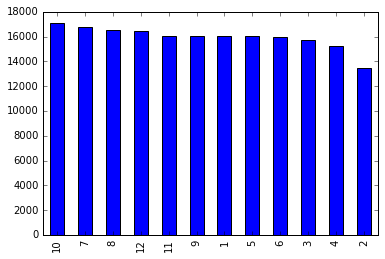

In [16]:
data['Month']=data['Date'].apply(lambda x: x.month)
data['Weekday']=data['Date'].apply(lambda x: x.weekday()) 
(data['Month'].value_counts()).plot(kind='bar')

Fewest  February motor thefts occured in Feb.

#### Q: On which weekday did the most motor vehicle thefts occur?

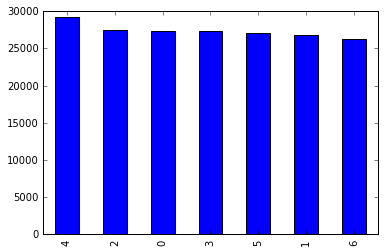

In [17]:
(data['Weekday'].value_counts()).plot(kind='bar')

#### Weekday  Monday is 0 and Sunday is 6
Max motor vehicle thefts occured on Friday

#### Each observation in the dataset represents a motor vehicle theft, and the Arrest variable indicates whether an arrest was later made for this theft. Which month has the largest number of motor vehicle thefts for which an arrest was made?

In [18]:
data.head()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Latitude,Longitude,Month,Weekday
0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012,41.756284,-87.621645,12,0
1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012,41.898788,-87.661303,12,0
2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,41.969186,-87.767670,12,0
3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012,41.769329,-87.657726,12,0
4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012,41.837568,-87.621761,12,0


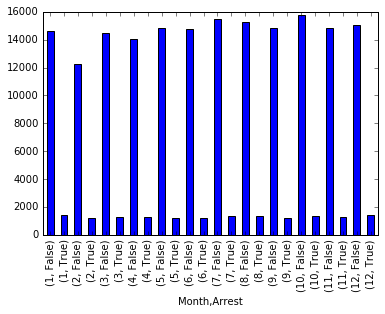

In [19]:
(data.groupby('Month')['Arrest'].value_counts()).plot(kind='bar')

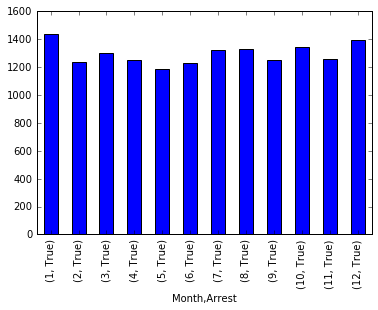

In [20]:
((data[data.Arrest == True]).groupby('Month')['Arrest'].value_counts()).plot(kind='bar')

In [21]:
data.groupby('Month')['Arrest'].value_counts()

Month  Arrest
1      False     14612
       True       1435
2      False     12273
       True       1238
3      False     14460
       True       1298
4      False     14028
       True       1252
5      False     14848
       True       1187
6      False     14772
       True       1230
7      False     15477
       True       1324
8      False     15243
       True       1329
9      False     14812
       True       1248
10     False     15744
       True       1342
11     False     14807
       True       1256
12     False     15029
       True       1397
Name: Arrest, dtype: int64

#### Max thefts when Arrest=True ie January

#### Visualizing Crime Trends
Let's make a histogram of the variable Date. 

In [22]:
data['Date'].dtype

dtype('<M8[ns]')

In [23]:
### To access datetime properties: use dt!! This gives frequency counts 
data.groupby(data.Date.dt.year).count()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Latitude,Longitude,Month,Weekday
Date,,,,,,,,,,,,,
2001,20669,20669,20669,20669,20669,20669,122,586,20669,20479,20479,20669,20669
2002,18753,18753,18753,18753,18753,18753,494,14236,18753,17274,17274,18753,18753
2003,16657,16657,16657,16657,16657,16657,12977,16657,16657,16615,16615,16657,16657
2004,16862,16862,16862,16862,16862,16862,16824,16861,16862,16826,16826,16862,16862
2005,16484,16484,16484,16484,16484,16484,16403,16484,16484,16403,16403,16484,16484
2006,16098,16098,16098,16098,16098,16098,16069,16097,16098,16069,16069,16098,16098
2007,14280,14280,14280,14280,14280,14280,14271,14280,14280,14271,14271,14280,14280
2008,14445,14445,14445,14445,14445,14445,14280,14445,14445,14281,14281,14445,14445
2009,12167,12167,12167,12167,12167,12167,12040,12166,12167,12042,12042,12167,12167


In [24]:
##to access counts by month do; without having to create a 'Month' variable. 
###Note: here the count only counts the number of occurances ie frequency
### count ...not value counts
data.groupby(data.Date.dt.month).count()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Latitude,Longitude,Month,Weekday
Date,,,,,,,,,,,,,
1,16047,16047,16047,16047,16047,16047,11749,13060,16047,15971,15971,16047,16047
2,13511,13511,13511,13511,13511,13511,9861,10980,13511,13403,13403,13511,13511
3,15758,15758,15758,15758,15758,15758,11909,13045,15758,15648,15648,15758,15758
4,15280,15280,15280,15280,15280,15280,11883,13247,15280,15157,15157,15280,15280
5,16035,16035,16035,16035,16035,16035,12661,14562,16035,15940,15940,16035,16035
6,16002,16002,16002,16002,16002,16002,12658,14369,16002,15911,15911,16002,16002
7,16801,16801,16801,16801,16801,16801,13104,14888,16801,16660,16660,16801,16801
8,16572,16572,16572,16572,16572,16572,13054,14833,16572,16425,16425,16572,16572
9,16060,16060,16060,16060,16060,16060,12516,14147,16060,15878,15878,16060,16060


#### In general, does it look like crime increases or decreases from 2002 - 2012?

In [25]:
data.groupby(data.Date.dt.year)['Date'].count()

Date
2001    20669
2002    18753
2003    16657
2004    16862
2005    16484
2006    16098
2007    14280
2008    14445
2009    12167
2010    15497
2011    15637
2012    14092
Name: Date, dtype: int64

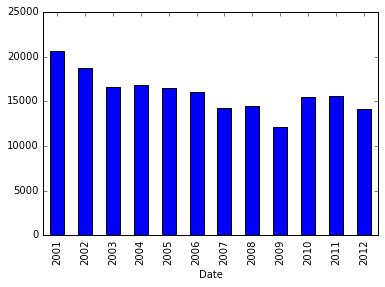

In [26]:
data.groupby(data.Date.dt.year)['Date'].count().plot(kind='bar')

#### Overall looks like crime is decreasing.

Now, let's see how arrests have changed over time. Create a boxplot of the variable "Date", sorted by the variable "Arrest" (if you are not familiar with boxplots and would like to learn more, check out this tutorial). In a boxplot, the bold horizontal line is the median value of the data, the box shows the range of values between the first quartile and third quartile, and the whiskers (the dotted lines extending outside the box) show the minimum and maximum values, excluding any outliers (which are plotted as circles). Outliers are defined by first computing the difference between the first and third quartile values, or the height of the box. This number is called the Inter-Quartile Range (IQR). Any point that is greater than the third quartile plus the IQR or less than the first quartile minus the IQR is considered an outlier.

Does it look like there were more crimes for which arrests were made in the first half of the time period or the second half of the time period? (Note that the time period is from 2001 to 2012, so the middle of the time period is the beginning of 2007.)


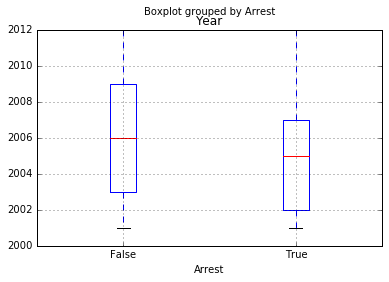

In [27]:
##Maybe for this I want to first remove data where Arrest=False? and create a Year variable?

data['Year']=data['Date'].apply(lambda x: x.year)
data.boxplot(column='Year',by='Arrest')

#### So number of arrests made in the first half of the time period are significantly more, though total number of crimes is more similar over the first and second half of the time period

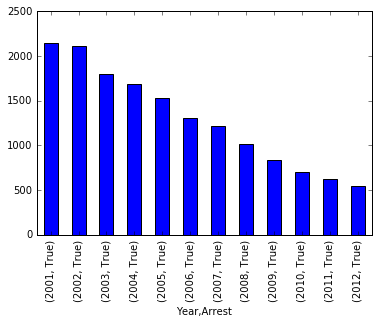

In [28]:
##To chk if what we got above makes sense..s
((data[data.Arrest == True]).groupby('Year')['Arrest'].value_counts()).plot(kind='bar')

#### For what proportion of motor vehicle thefts in 2001 was an arrest made?

In [29]:
(data[data.Year==2001])['Arrest'].value_counts()

False    18517
True      2152
Name: Arrest, dtype: int64

In [30]:
prop=2152.0/(2152+18517)
prop

0.10411727708161982

#### For what proportion of motor vehicle thefts in 2007 was an arrest made?


In [31]:
(data[data.Year==2007])['Arrest'].value_counts()

False    13068
True      1212
Name: Arrest, dtype: int64

In [32]:
prop_2=1212.0/(1212+13068)
print prop_2

0.0848739495798


#### Q: For what proportion of motor vehicle thefts in 2012 was an arrest made?

In [33]:
(data[data.Year==2012])['Arrest'].value_counts()

False    13542
True       550
Name: Arrest, dtype: int64

In [34]:
prop3=550.0/(550.0+13542)
prop3

0.03902923644621062

#### Q: Find the top five locations where motor vehicle thefts occur. 
Create a subset of your data, only taking observations for which the theft happened in one of these five locations, and call this new data set "Top5". How many observations are in Top5?


In [35]:
data['LocationDescription'].value_counts().head(5)

STREET                            156564
PARKING LOT/GARAGE(NON.RESID.)     14852
OTHER                               4573
ALLEY                               2308
GAS STATION                         2111
Name: LocationDescription, dtype: int64

In [36]:
top5=data[ (data.LocationDescription=='STREET')|
           (data.LocationDescription=='ALLEY') |
           (data.LocationDescription=='GAS STATION')|
           (data.LocationDescription=='PARKING LOT/GARAGE(NON.RESID.)') |
           (data.LocationDescription=='DRIVEWAY - RESIDENTIAL')
           ]
top5.shape

(177510, 13)

#### Q: One of the locations has a much higher arrest rate than the other locations. Which is it?

In [37]:
#### Note we need the arrest RATE:
aa=top5.groupby('LocationDescription')['Arrest'].value_counts()
aa

LocationDescription             Arrest
ALLEY                           False       2059
                                True         249
DRIVEWAY - RESIDENTIAL          False       1543
                                True         132
GAS STATION                     False       1672
                                True         439
PARKING LOT/GARAGE(NON.RESID.)  False      13249
                                True        1603
STREET                          False     144969
                                True       11595
Name: Arrest, dtype: int64

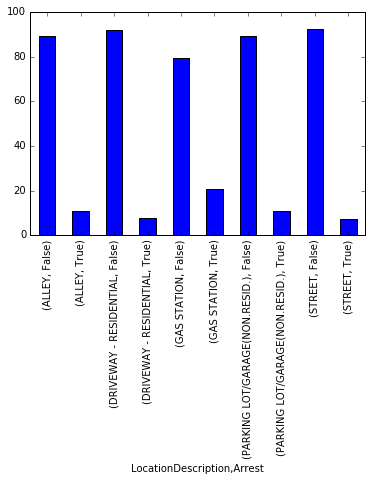

In [38]:
aa.groupby(level=0).apply(lambda x: 100*x/x.sum()).plot(kind='bar')

#### A: Arrest rate is maximum at Gas Station

#### Q:  On which day of the week do the most motor vehicle thefts at gas stations happen? Note: its NOT asking when the most arrests happen

In [39]:
df=(top5[top5.LocationDescription== 'GAS STATION']).groupby('Weekday')['Arrest'].value_counts()
df

Weekday  Arrest
0        False     215
         True       65
1        False     213
         True       57
2        False     210
         True       63
3        False     229
         True       53
4        False     268
         True       64
5        False     270
         True       68
6        False     267
         True       69
Name: Arrest, dtype: int64

In [40]:
df.groupby(level=0).apply(lambda x: x.sum())

Weekday
0    280
1    270
2    273
3    282
4    332
5    338
6    336
Name: Arrest, dtype: int64

#### Saturday is when most gas station thefts happen

#### Q: On which day of the week do the FEWEST motor vehicle thefts in residential driveways happen?

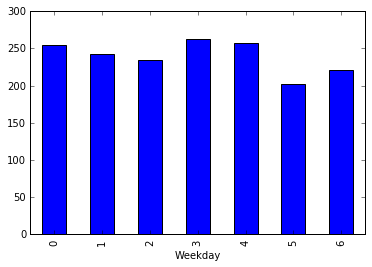

In [41]:
((top5[top5.LocationDescription== 'DRIVEWAY - RESIDENTIAL']).groupby('Weekday')['Arrest'].value_counts()).groupby(level=0).apply(lambda x: x.sum()).plot(kind='bar')

#### Saturday!!